In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters Vector

Load, merge, normalization vector of parameters.

In [4]:
# Loading each csv file
df1 = pd.read_csv('TimeFreq_Male_1part.csv')
df2 = pd.read_csv('TimeFreq_Male_2part.csv')

Concatenating all four DataFrames into one.

In [5]:
allpatients = pd.concat([df1,df2])
allpatients.head()

,MFCC1,MFCC2,MFCC3,MCCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,RMS,ZCR,F0,MAX,MIN,KURTOSIS,SKEWNESS,Status
0,-159.228454,228.193813,-72.860847,12.054815,-20.038634,-51.429874,35.373472,10.206009,-14.105386,20.784272,0.191970,0.058613,720.264769,0.889806,-0.896195,1.154653,-0.278985,Zdrowy
1,-194.278407,167.856950,-22.582641,-16.469409,-37.210081,-6.952637,4.684568,14.496068,-14.452621,-5.557418,0.151266,0.054219,424.036365,0.699998,-0.896794,2.979608,0.072243,Zdrowy
2,-204.708499,207.781207,-12.110173,12.437783,-40.503349,-32.549806,40.207563,8.010343,-12.046658,16.719370,0.196364,0.050996,603.209538,0.672834,-0.710505,0.712838,-0.001326,Zdrowy
3,-201.945519,187.971941,-26.592059,24.571099,-40.022201,-16.593583,37.142178,-1.771934,-9.379099,3.387880,0.102348,0.038217,165.743458,0.302423,-0.411391,0.969498,0.309411,Zdrowy
4,-157.665927,163.330572,-28.770227,9.960016,-42.026430,-16.864023,29.366883,11.448391,-15.336587,4.399188,0.129532,0.046650,354.574072,0.423341,-0.586455,1.982088,-0.035419,Zdrowy


Features has diffrent rows, so they have to be normalized.

In [6]:
features = allpatients.drop(labels='Status',axis=1).columns
for i in features:
    allpatients[i] = (allpatients[i] - np.mean(allpatients[i]))/np.std(allpatients[i])
allpatients.head()

,MFCC1,MFCC2,MFCC3,MCCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,RMS,ZCR,F0,MAX,MIN,KURTOSIS,SKEWNESS,Status
0,0.753663,2.129143,-2.440198,1.353340,0.630613,-2.244170,2.210052,0.177209,-0.608710,2.093379,0.349153,0.590512,1.215996,2.262988,-1.428772,0.756403,-0.489581,Zdrowy
1,-0.042240,0.149002,-0.510070,-0.317442,-0.411474,0.332335,-0.010554,0.512852,-0.635038,-0.136014,-0.397353,0.353126,-0.017769,1.098564,-1.431864,2.558879,0.358007,Zdrowy
2,-0.279083,1.459240,-0.108042,1.375772,-0.611333,-1.150474,2.559841,0.005426,-0.452613,1.749351,0.429743,0.179014,0.728471,0.931921,-0.471140,0.320030,0.180469,Zdrowy
3,-0.216342,0.809138,-0.663987,2.086470,-0.582133,-0.226152,2.338034,-0.759913,-0.250354,0.621059,-1.294500,-0.511390,-1.093535,-1.340451,1.071438,0.573528,0.930342,Zdrowy
4,0.789145,0.000455,-0.747605,1.230639,-0.703764,-0.241818,1.775424,0.274410,-0.702062,0.706650,-0.795943,-0.055815,-0.307073,-0.598652,0.168603,1.573646,0.098196,Zdrowy


Afterwards data have to be suffled, in order to avoid overfitting

In [7]:
allpatients = allpatients.sample(frac=1).reset_index(drop=True)
allpatients.head()

,MFCC1,MFCC2,MFCC3,MCCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,RMS,ZCR,F0,MAX,MIN,KURTOSIS,SKEWNESS,Status
0,-0.551604,0.554339,0.275025,0.147524,0.015254,0.376280,-0.453730,0.446419,0.593355,0.163876,-0.638331,-0.365281,-1.072250,-0.219198,0.588455,-0.354155,0.922287,Zdrowy
1,-0.086153,0.537243,0.040099,-0.940725,-0.010972,1.572287,-1.798296,0.720837,0.048819,-0.139768,-0.772424,-0.120671,0.768874,-0.696305,0.889913,0.200972,0.543038,Zdrowy
2,-0.661898,0.821982,0.516983,-0.107900,-0.259574,-0.764728,0.322461,0.607437,-1.214540,-0.508143,-0.128160,0.041590,-1.263931,1.131470,-1.643292,1.619279,-0.217269,Chory
3,-0.721408,0.545146,-0.878343,-0.678634,-2.160680,-0.487374,-0.562736,-1.315583,-0.061480,0.349657,1.154941,0.615878,0.986594,0.043131,0.243402,-1.331232,0.062792,Chory
4,-1.458809,-1.009334,0.114655,-0.588740,-1.243220,-0.579540,0.051092,-0.051623,-1.007936,-0.163157,-1.050551,0.289813,0.747663,-1.309809,1.213824,-0.448302,0.000540,Zdrowy


# PCA

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(n_components=3)
pca.fit(allpatients.drop(['Status'], axis=1))
X = pca.transform(allpatients.drop(['Status'], axis=1))
X = pd.DataFrame(X, columns=['A','B','C'])
X['Status'] = allpatients['Status']

In [10]:
from mpl_toolkits.mplot3d import Axes3D

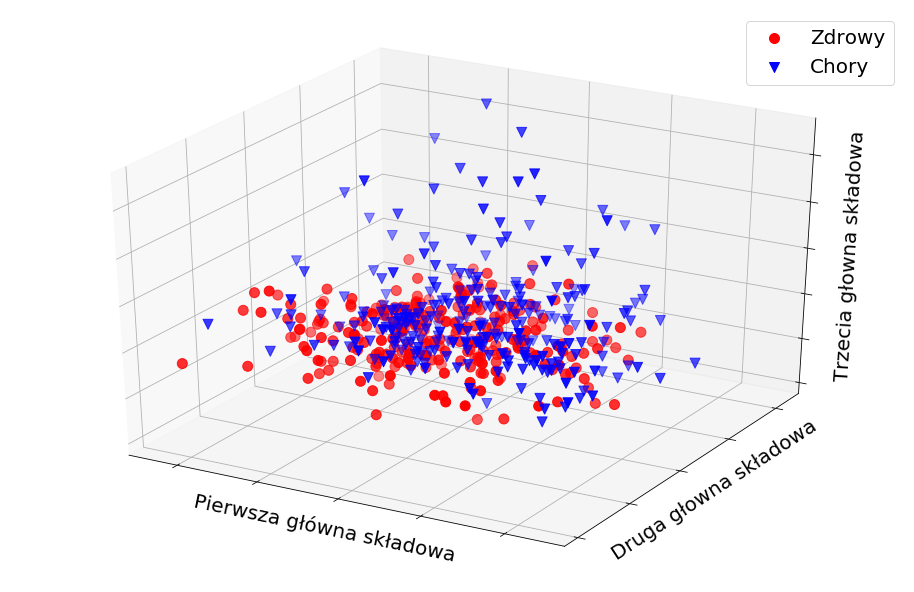

In [73]:
fig = plt.figure()
fig.set_size_inches(16, 10.5)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[X['Status']=='Zdrowy']['A'],
           X[X['Status']=='Zdrowy']['B'],
           X[X['Status']=='Zdrowy']['C'],
           s=100,
           c='r',
           marker='o',
           label='Zdrowy')
ax.scatter(X[X['Status']=='Chory']['A'],
           X[X['Status']=='Chory']['B'],
           X[X['Status']=='Chory']['C'],
           s=100,
           c='b',
           marker='v',
           label='Chory')
plt.legend(loc='upper right', frameon = True, fontsize=20)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_zticklabels([])
ax.set_xlabel('Pierwsza główna składowa', fontsize=20)
ax.set_ylabel('Druga główna składowa', fontsize=20)
ax.set_zlabel('Trzecia główna składowa', fontsize=20)
plt.show()

# Dummy variables
We'll need to convert categorical features (Status) to dummy variables, because our alghoritm can't understant what means 'healthy'.

In [12]:
status = pd.get_dummies(allpatients['Status'],drop_first=True)

In [13]:
allpatients.drop(['Status'],axis=1,inplace=True)

In [14]:
allpatients['Chory'] = status
allpatients.head()

,MFCC1,MFCC2,MFCC3,MCCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,RMS,ZCR,F0,MAX,MIN,KURTOSIS,SKEWNESS,Chory
0,-0.551604,0.554339,0.275025,0.147524,0.015254,0.376280,-0.453730,0.446419,0.593355,0.163876,-0.638331,-0.365281,-1.072250,-0.219198,0.588455,-0.354155,0.922287,1
1,-0.086153,0.537243,0.040099,-0.940725,-0.010972,1.572287,-1.798296,0.720837,0.048819,-0.139768,-0.772424,-0.120671,0.768874,-0.696305,0.889913,0.200972,0.543038,1
2,-0.661898,0.821982,0.516983,-0.107900,-0.259574,-0.764728,0.322461,0.607437,-1.214540,-0.508143,-0.128160,0.041590,-1.263931,1.131470,-1.643292,1.619279,-0.217269,0
3,-0.721408,0.545146,-0.878343,-0.678634,-2.160680,-0.487374,-0.562736,-1.315583,-0.061480,0.349657,1.154941,0.615878,0.986594,0.043131,0.243402,-1.331232,0.062792,0
4,-1.458809,-1.009334,0.114655,-0.588740,-1.243220,-0.579540,0.051092,-0.051623,-1.007936,-0.163157,-1.050551,0.289813,0.747663,-1.309809,1.213824,-0.448302,0.000540,1


# Train test split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(allpatients.drop(['Chory'], axis=1), 
                                                    allpatients['Chory'], 
                                                    test_size=0.20, 
                                                    random_state=42)

# Logistic Regression Algorithm

In [17]:
from sklearn.linear_model import LogisticRegression

In [44]:
logModel = LogisticRegression(C = 0.0006, solver='liblinear')
logModel.fit(X_train, y_train)

LogisticRegression(C=0.0006, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [45]:
prediction = logModel.predict(X_test)

# Evaluation
Check precission, recall, f1-score using classification report

In [46]:
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.68      0.52      0.59        50
           1       0.64      0.78      0.70        54

   micro avg       0.65      0.65      0.65       104
   macro avg       0.66      0.65      0.65       104
weighted avg       0.66      0.65      0.65       104



In [22]:
print(confusion_matrix(y_test,prediction))

[[23 27]
 [10 44]]


# Random Forest Algorithm

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
clf = RandomForestClassifier(n_estimators=450)

In [65]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=450, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [66]:
prediction = clf.predict(X_test)

# Evaluation
Check precission, recall, f1-score using classification report

In [67]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.72      0.58      0.64        50
           1       0.67      0.80      0.73        54

   micro avg       0.69      0.69      0.69       104
   macro avg       0.70      0.69      0.69       104
weighted avg       0.70      0.69      0.69       104



In [28]:
print(confusion_matrix(y_test,prediction))

[[29 21]
 [11 43]]


In [29]:
feature_importance = clf.feature_importances_

[Text(0,0,'MFCC1'),
 Text(0,0,'MFCC2'),
 Text(0,0,'MFCC3'),
 Text(0,0,'MCCC4'),
 Text(0,0,'MFCC5'),
 Text(0,0,'MFCC6'),
 Text(0,0,'MFCC7'),
 Text(0,0,'MFCC8'),
 Text(0,0,'MFCC9'),
 Text(0,0,'MFCC10'),
 Text(0,0,'RMS'),
 Text(0,0,'ZCR'),
 Text(0,0,'F0'),
 Text(0,0,'Maks'),
 Text(0,0,'Min'),
 Text(0,0,'Kurt'),
 Text(0,0,'Skos')]

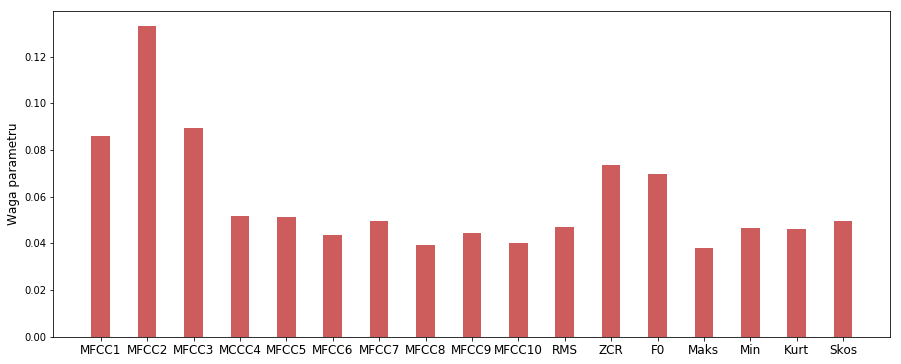

In [80]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
plt.grid(b=False)
ind = np.arange(len(feature_importance))  # the x locations for the groups
width = 0.4  # the width of the bars
ax.bar(ind, feature_importance, width, color='IndianRed')
ax.set_ylabel('Waga parametru', fontsize=12)
ax.set_xticks(ind)
ax.set_xticklabels(['MFCC1', 'MFCC2', 'MFCC3', 'MCCC4', 'MFCC5', 'MFCC6', 'MFCC7', 'MFCC8',
                    'MFCC9', 'MFCC10', 'RMS', 'ZCR', 'F0', 'Maks', 'Min', 'Kurt', 'Skos'], fontsize=12)

In [75]:
allpatients.columns

Index(['MFCC1', 'MFCC2', 'MFCC3', 'MCCC4', 'MFCC5', 'MFCC6', 'MFCC7', 'MFCC8',
       'MFCC9', 'MFCC10', 'RMS', 'ZCR', 'F0', 'MAX', 'MIN', 'KURTOSIS',
       'SKEWNESS', 'Chory'],
      dtype='object')